In [ ]:
nsorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('churndata.csv')

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset['Churn'] = dataset['Churn'].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-2961307015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Churn'] = dataset['Churn'].replace({'No': 0, 'Yes': 1})


In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
dataset.shape

(7043, 21)

In [ ]:
X = dataset.iloc[:,1:20]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
y= dataset.iloc[:,20]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
X_new = X[['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']]

object_columns = X_new.select_dtypes(include='object').columns.tolist()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
X_encoded = pd.get_dummies(X, columns=object_columns, drop_first=False)
X_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.5,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.9,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.6,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
X_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [ ]:
# ## Feature engineering --> One hot Encoding
# geography = pd.get_dummies(X["Geography"],drop_first = True)
# gender = pd.get_dummies(X["Gender"],drop_first = True)

In [ ]:
# #Dropping the Geography and Gender column from the main Data

# X= X.drop(["Geography","Gender"],axis=1)
# X.head()

In [ ]:
X_encoded['TotalCharges'] = pd.to_numeric(X_encoded['TotalCharges'], errors='coerce')

In [ ]:
X_encoded["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
X_encoded["TotalCharges"].dtype

dtype('float64')

In [ ]:
#X = pd.concat([X,geography,gender],axis=1)
X_encoded= X_encoded.replace({True:1,False:0})
X_encoded

/tmp/ipython-input-3814310371.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded= X_encoded.replace({True:1,False:0})


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
#X_encoded = X_encoded[X_encoded['TotalCharges'].notna()]

In [ ]:
X_encoded.dropna(how='all')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
## Splitting the dataset into Train test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=0)

In [ ]:
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

In [ ]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2920,0,72,85.10,6155.40,1,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,1
2966,1,14,46.35,672.70,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6099,0,71,24.70,1810.55,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5482,0,33,73.90,2405.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
2012,0,47,98.75,4533.70,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,15,103.45,1539.80,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3264,0,10,91.10,964.35,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1653,0,58,20.75,1185.95,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
2607,1,1,69.75,69.75,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
 # Avoide Data Lekage
##  Data Leakage Prevention:
## By fitting the scaling parameters on the training set only, we avoid inadvertently
## incorporating information from the test set into the model during training
## which could lead to an overly optimistic evaluation of the model's performance.


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_test

array([[-0.4397627 , -0.54442123, -0.22069469, ..., -0.51857393,
         1.4041079 , -0.54877567],
       [-0.4397627 ,  1.1241654 ,  1.72202508, ...,  1.92836536,
        -0.71219598, -0.54877567],
       [-0.4397627 , -0.78860463,  0.23670937, ..., -0.51857393,
         1.4041079 , -0.54877567],
       ...,
       [ 2.27395367,  0.96137646,  1.56733934, ..., -0.51857393,
         1.4041079 , -0.54877567],
       [-0.4397627 , -0.58511846, -0.2855629 , ..., -0.51857393,
        -0.71219598,  1.82223822],
       [-0.4397627 , -1.27697145, -0.63318998, ..., -0.51857393,
        -0.71219598,  1.82223822]])

In [ ]:
X_train.shape

(5634, 45)

In [ ]:
**ANN IMPLEMENTATION **

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
## As we have 45 input features i.e in X_train

classifier.add(Dense(units=45,activation='relu'))  #Here Relu will be applied to next layer

In [ ]:
## Adding the 1st Hidden layer
# No of Neurons in HIdden layer can be any, But here we are not focusing on the no. of neurons part

classifier.add(Dense(units=40,activation='relu'))

# In hidden layer you can add the dropout layer,
# The line of Code can be added with each line of Hidden layer code
classifier.add(Dropout(0.3))

In [ ]:
## Adding the 2nd Hidden

classifier.add(Dense(units = 44,activation='relu'))

#with each hidden layer( line of code you have to add the dropout functionality to reduce the "Overfitting")
#  ----> classifier.add(Dropout(0.3))

In [ ]:
# Adding the output layer, as this is binary classification problem
# for the activation function , we can leverage the " Sigmoid Activation Function"

classifier.add(Dense(units=1,activation="sigmoid"))

In [ ]:
#  https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# adam
#The above line of code will directily take the learning rate as 0.01 , otherwise if you want to
# do it specefically, you can use the following lines specificaly.

##  import tensorflow
##  opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
## Early Stopping
## We add early stopping so thet after some epochs, when the accuracy does not changes or it stabilize this
## will stop the flow, rather than going for entire epochs intervals


import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# A validation split in deep learning is a process of dividing a dataset into three subsets:
# training, testing, and validation. The validation set is used to evaluate the model's performance during training,
# which helps to prevent overfitting and improve the model's generalization to new data.

model_history = classifier.fit(X_train,y_train,validation_split = 0.33, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7072 - loss: 0.5272 - val_accuracy: 0.8038 - val_loss: 0.4135
Epoch 2/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7920 - loss: 0.4293 - val_accuracy: 0.8022 - val_loss: 0.4118
Epoch 3/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8030 - loss: 0.4171 - val_accuracy: 0.8048 - val_loss: 0.4102
Epoch 4/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - loss: 0.4208 - val_accuracy: 0.8075 - val_loss: 0.4084
Epoch 5/1000
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.4004 - val_accuracy: 0.8032 - val_loss: 0.4094


In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

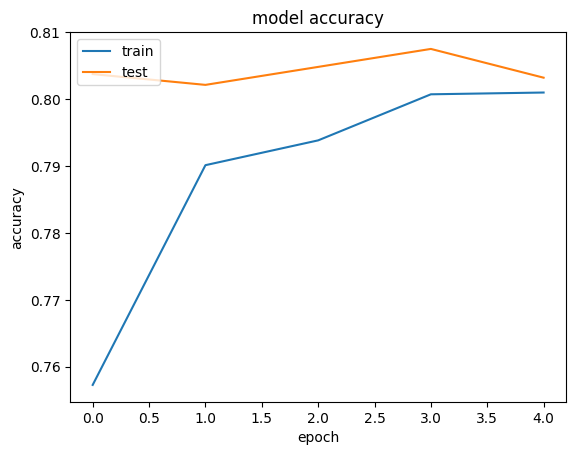

In [ ]:
', 'test'], loc='upper left')
plt.show()

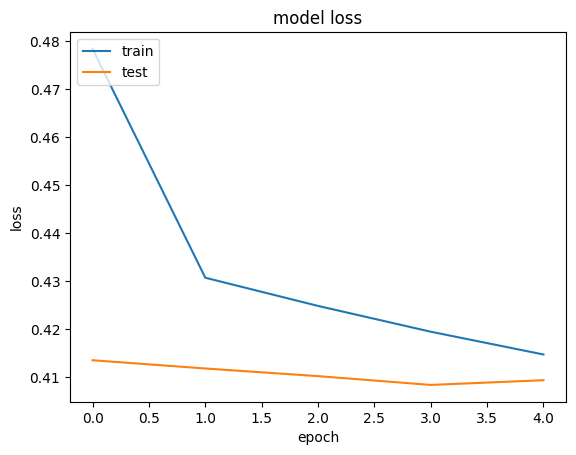

In [ ]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Perdiction for the test data

y_pred = classifier.predict(X_test)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.12189955],
       [0.20061289],
       [0.40772772],
       ...,
       [0.28505537],
       [0.11838505],
       [0.5442229 ]], dtype=float32)

In [ ]:
# we are doing like this because this is binary classification problem, and in
# sigmodi function if value is >= 0.5 we consider as 1, otherwise it is zero
# therefore the below step


y_pred = (y_pred >=0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[917, 124],
       [168, 200]])

In [ ]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.7927608232789212

In [ ]:
# Now if you want to check the weight values

classifier.get_weights()

[array([[ 0.09800376, -0.14905143,  0.02791519, ..., -0.20459636,
         -0.16648102, -0.16714774],
        [ 0.00799355,  0.35131866,  0.38281032, ...,  0.26634875,
          0.14145796,  0.13727695],
        [-0.21733686,  0.10949516, -0.01891133, ...,  0.17579645,
         -0.12581062, -0.29053628],
        ...,
        [ 0.22824298, -0.02242939, -0.27558252, ...,  0.14471124,
          0.17827035,  0.10654718],
        [ 0.06119407, -0.28171712,  0.09508671, ...,  0.01212038,
         -0.303471  ,  0.12322883],
        [ 0.18814   , -0.14920564,  0.10930345, ..., -0.03969154,
          0.20642   ,  0.21256265]], dtype=float32),
 array([ 0.04036041,  0.03187475,  0.09793701,  0.00913237, -0.06951354,
        -0.00596392, -0.07073203, -0.05792023, -0.06697666, -0.04278513,
        -0.04097861, -0.03666675,  0.01140264,  0.04567427, -0.00115397,
        -0.04009841,  0.0009486 , -0.01796975,  0.01567126, -0.06501456,
        -0.00392866, -0.03748187, -0.02113575,  0.0771182 , -0.128